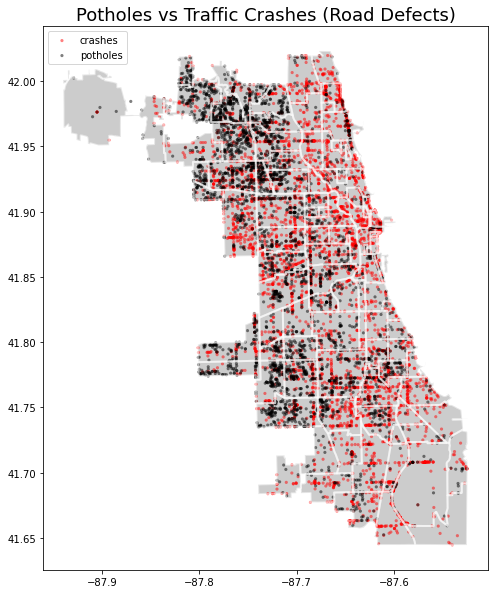

In [1]:
%load_ext lab_black
import os
from combine import recombine
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# load Chicago neighborhood shapefile
zones = "../data/neighborhoods.shp"

# plot neighborhoods with hover label
map_zones = gpd.read_file(zones)
fig, ax = plt.subplots(figsize=(10, 10))

# map_zones.apply(lambda x: ax.annotate(text=x.pri_neigh, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
zone_plot = map_zones.boundary.plot(ax=ax, color="white", linewidth=2, alpha=0.5)
zone_plot = map_zones.plot(ax=ax, color="grey", alpha=0.4)

# load traffic crashes csv and filter for missing points
crashes = recombine("../data/crashes_1.csv", "../data/crashes_2.csv")
crashes = crashes.loc[crashes["LATITUDE"] != 0]
crashes = crashes.loc[crashes["LONGITUDE"] != 0]

# load potholes data and filter for missing points
potholes = recombine("../data/potholes_1.csv", "../data/potholes_2.csv")
potholes.drop_duplicates(subset=["SERVICE REQUEST NUMBER"], inplace=True)
potholes = potholes.loc[potholes["LONGITUDE"] != 0]
potholes = potholes.loc[potholes["LATITUDE"] != 0]
potholes = potholes.loc[potholes["STATUS"] == "Open"]

# create geodataframes
crs = "epsg:4326"
crash_geo = [Point(xy) for xy in zip(crashes["LONGITUDE"], crashes["LATITUDE"])]
crash_gdf = GeoDataFrame(crashes, crs=crs, geometry=crash_geo)
pothole_geo = [Point(xy) for xy in zip(potholes["LONGITUDE"], potholes["LATITUDE"])]
pothole_gdf = GeoDataFrame(potholes, crs=crs, geometry=pothole_geo)

# plot crashes and potholes on zipcode map
map2 = crash_gdf.plot(
    ax=ax,
    markersize=10,
    color="red",
    marker="o",
    alpha=0.5,
    edgecolors="none",
    label="crashes",
)
map2 = pothole_gdf.plot(
    ax=ax,
    markersize=10,
    color="black",
    marker="o",
    alpha=0.5,
    edgecolors="none",
    label="potholes",
)

# save figure as png
map2.set_title(
    label="Potholes vs Traffic Crashes (Road Defects)", fontsize=18, loc="center"
)
map2.legend(loc="upper left")
mapf = map2.get_figure()
os.makedirs("../artifacts", exist_ok=True)
mapf.savefig("../artifacts/dualmap.png")